##Plano de preparação de dados para modelo preditivo

**Você é um analista de dados em uma grande empresa de varejo on-line que acaba de concluir uma campanha de marketing direcionada. A empresa coletou diversos dados sobre os clientes, incluindo informações demográficas, comportamento de compra e respostas à campanha. Agora, sua tarefa é preparar esse conjunto de dados para construir um modelo preditivo que ajudará a empresa a segmentar melhor seus clientes em campanhas futuras.**

**O conjunto de dados contém algumas inconsistências, valores faltantes e variáveis categóricas que precisam ser tratadas para garantir que o modelo preditivo seja preciso e eficaz, conforme apresentado na tabela abaixo:**

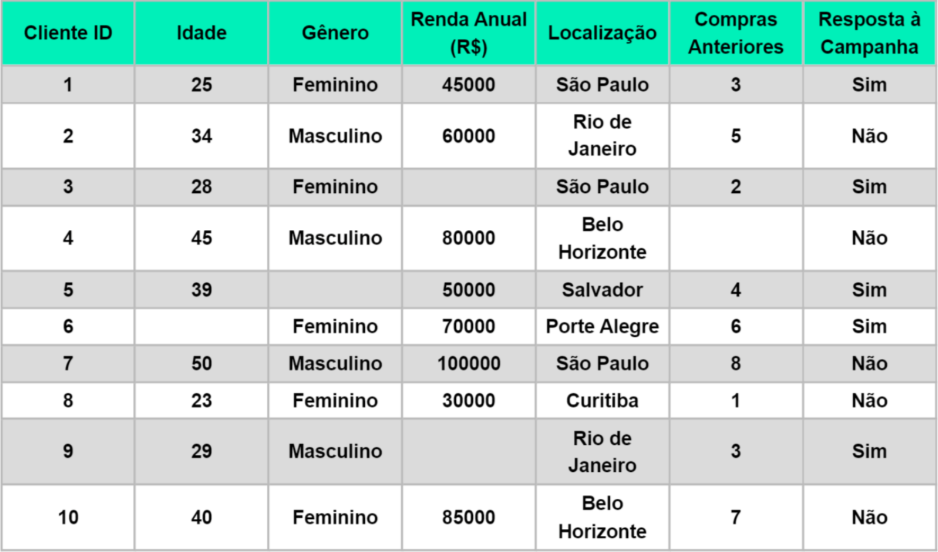

In [16]:
#Importando bibliotecas
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (LabelEncoder, StandardScaler)

In [17]:
#criando um dataFrame com o conjunto de dados
dados = pd.DataFrame({
    "cliente_id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "idade": [25, 34, 28, 45, 39, None, 50, 23, 29, 40],
    "genero": ["feminino", "masculino", "feminino", "masculino", None, "feminino", "masculino", "feminino", "masculino", "feminino"],
    "renda_anual_r$": [45000, 60000, None, 80000, 50000, 70000, 100000, 30000, None, 85000],
    "localizacao": ["São Paulo", "Rio de Janeiro", "São Paulo", "Belo Horizonte", "Salvador", "Porto Alegre", "São Paulo", "Curitiba", "Rio de Janeiro", "Belo Horizonte"],
    "compras_anteriores": [3, 5, 2, None, 4, 6, 8, 1, 3, 7],
    "resposta_a_campanha": ["Sim", "Não", "Sim", "Não", "Sim", "Sim", "Não", "Não", "Sim", "Não"]
})

dados

,cliente_id,idade,genero,renda_anual_r$,localizacao,compras_anteriores,resposta_a_campanha
0,1,25.0,feminino,45000.0,São Paulo,3.0,Sim
1,2,34.0,masculino,60000.0,Rio de Janeiro,5.0,Não
2,3,28.0,feminino,NaN,São Paulo,2.0,Sim
3,4,45.0,masculino,80000.0,Belo Horizonte,NaN,Não
4,5,39.0,None,50000.0,Salvador,4.0,Sim
5,6,NaN,feminino,70000.0,Porto Alegre,6.0,Sim
6,7,50.0,masculino,100000.0,São Paulo,8.0,Não
7,8,23.0,feminino,30000.0,Curitiba,1.0,Não
8,9,29.0,masculino,NaN,Rio de Janeiro,3.0,Sim
9,10,40.0,feminino,85000.0,Belo Horizonte,7.0,Não


In [18]:
#identificar a quantidade de valores ausentes em cada coluna
dados.isnull().sum()

,0
cliente_id,0
idade,1
genero,1
renda_anual_r$,2
localizacao,0
compras_anteriores,1
resposta_a_campanha,0


Trabalharemos por partes. Inicialmente trataremos o valor ausente na coluna idade. Usaremos Imputação preenchendo a idade faltante com a média das idades, visando a preservação da quantidade de elementos.

In [19]:
#Usando imputação para preencher valor faltante na coluna idade com a média

imputer = SimpleImputer(strategy="mean")

dados[["idade"]] = imputer.fit_transform(dados[["idade"]])

dados

,cliente_id,idade,genero,renda_anual_r$,localizacao,compras_anteriores,resposta_a_campanha
0,1,25.000000,feminino,45000.0,São Paulo,3.0,Sim
1,2,34.000000,masculino,60000.0,Rio de Janeiro,5.0,Não
2,3,28.000000,feminino,NaN,São Paulo,2.0,Sim
3,4,45.000000,masculino,80000.0,Belo Horizonte,NaN,Não
4,5,39.000000,None,50000.0,Salvador,4.0,Sim
5,6,34.777778,feminino,70000.0,Porto Alegre,6.0,Sim
6,7,50.000000,masculino,100000.0,São Paulo,8.0,Não
7,8,23.000000,feminino,30000.0,Curitiba,1.0,Não
8,9,29.000000,masculino,NaN,Rio de Janeiro,3.0,Sim
9,10,40.000000,feminino,85000.0,Belo Horizonte,7.0,Não


Seguindo a transformação no plano de preparação, iremos transformar a coluna gênero utilizando label encoding. O gênero "Masculino" passará a ser 1 e o "Feminino", 0. Essa transformação de valores categóricos para binário pode ser imensamente eficaz para o modelo, podendo apontar, através do modelo de predição a ser usado, relações significativas de gênero nas vendas. Caso as variáveis categóricas fossem preservadas, o modelo não iria performar tão bem como com as variáveis binárias. Antes de aplicar o label encoding, iremos aplicar imputação no gênero faltante do cliente 5.

In [20]:
#preenche o genero faltante do cliente 5 com a moda
dados["genero"] = dados["genero"].fillna(dados["genero"].mode()[0])
#print(dados)

#mapeando a coluna genero usando label enconding

le = LabelEncoder()
dados["genero"] = le.fit_transform(dados["genero"])

dados

,cliente_id,idade,genero,renda_anual_r$,localizacao,compras_anteriores,resposta_a_campanha
0,1,25.000000,0,45000.0,São Paulo,3.0,Sim
1,2,34.000000,1,60000.0,Rio de Janeiro,5.0,Não
2,3,28.000000,0,NaN,São Paulo,2.0,Sim
3,4,45.000000,1,80000.0,Belo Horizonte,NaN,Não
4,5,39.000000,0,50000.0,Salvador,4.0,Sim
5,6,34.777778,0,70000.0,Porto Alegre,6.0,Sim
6,7,50.000000,1,100000.0,São Paulo,8.0,Não
7,8,23.000000,0,30000.0,Curitiba,1.0,Não
8,9,29.000000,1,NaN,Rio de Janeiro,3.0,Sim
9,10,40.000000,0,85000.0,Belo Horizonte,7.0,Não


Seguindo o plano de preparação iremos aplicar imputação utilizando a mediana para susbstituir os valores ausentes na coluna de renda anual. Escolhemos a mediana pois ela é robusta a outliers, preservando o modelo que vai receber os dados desses outliers.

In [21]:
#imputando valores faltantes na coluna renda anual com a mediana
imputer = SimpleImputer(strategy="median")

dados[['renda_anual_r$']] = imputer.fit_transform(dados[['renda_anual_r$']])

dados

,cliente_id,idade,genero,renda_anual_r$,localizacao,compras_anteriores,resposta_a_campanha
0,1,25.000000,0,45000.0,São Paulo,3.0,Sim
1,2,34.000000,1,60000.0,Rio de Janeiro,5.0,Não
2,3,28.000000,0,65000.0,São Paulo,2.0,Sim
3,4,45.000000,1,80000.0,Belo Horizonte,NaN,Não
4,5,39.000000,0,50000.0,Salvador,4.0,Sim
5,6,34.777778,0,70000.0,Porto Alegre,6.0,Sim
6,7,50.000000,1,100000.0,São Paulo,8.0,Não
7,8,23.000000,0,30000.0,Curitiba,1.0,Não
8,9,29.000000,1,65000.0,Rio de Janeiro,3.0,Sim
9,10,40.000000,0,85000.0,Belo Horizonte,7.0,Não


Para uma melhor utilização da informação da coluna localização também iremos aplicar label enconding para que o algoritmo processe melhor a informação.

In [22]:
# Label Encoding para variáveis categóricas
le = LabelEncoder()
dados["localizacao_encoded"] = le.fit_transform(dados["localizacao"])

# Mover 'localizacao_encoded' para o índice 5 (logo após localizacao)
coluna_para_mover = dados.pop('localizacao_encoded') # Remove a coluna e a armazena
dados.insert(5, 'localizacao_encoded', coluna_para_mover) # Insere a coluna na posição 5
dados


,cliente_id,idade,genero,renda_anual_r$,localizacao,localizacao_encoded,compras_anteriores,resposta_a_campanha
0,1,25.000000,0,45000.0,São Paulo,5,3.0,Sim
1,2,34.000000,1,60000.0,Rio de Janeiro,3,5.0,Não
2,3,28.000000,0,65000.0,São Paulo,5,2.0,Sim
3,4,45.000000,1,80000.0,Belo Horizonte,0,NaN,Não
4,5,39.000000,0,50000.0,Salvador,4,4.0,Sim
5,6,34.777778,0,70000.0,Porto Alegre,2,6.0,Sim
6,7,50.000000,1,100000.0,São Paulo,5,8.0,Não
7,8,23.000000,0,30000.0,Curitiba,1,1.0,Não
8,9,29.000000,1,65000.0,Rio de Janeiro,3,3.0,Sim
9,10,40.000000,0,85000.0,Belo Horizonte,0,7.0,Não


No seguite passo do nosso plano iremos preencher o valor faltante na coluna de compras anteriores com a mediana das compras masculinas utilizando imputação condicional, preservando o perfil do consumidor do gênero masculino.

In [23]:
#guardando o consumo dos clientes do gênero masculino
compras_masculino = dados[(dados["genero"] == 1) & (dados["compras_anteriores"].notnull())]

#extraindo a média da quantidade de compras dos clientes do gênero masculino
media_compras_masculino = compras_masculino['compras_anteriores'].median()

#aplicando a media  na linha 3 da coluna de compras anteriores, onde esta o valor ausente
dados.loc[3, 'compras_anteriores'] = media_compras_masculino

dados

,cliente_id,idade,genero,renda_anual_r$,localizacao,localizacao_encoded,compras_anteriores,resposta_a_campanha
0,1,25.000000,0,45000.0,São Paulo,5,3.0,Sim
1,2,34.000000,1,60000.0,Rio de Janeiro,3,5.0,Não
2,3,28.000000,0,65000.0,São Paulo,5,2.0,Sim
3,4,45.000000,1,80000.0,Belo Horizonte,0,5.0,Não
4,5,39.000000,0,50000.0,Salvador,4,4.0,Sim
5,6,34.777778,0,70000.0,Porto Alegre,2,6.0,Sim
6,7,50.000000,1,100000.0,São Paulo,5,8.0,Não
7,8,23.000000,0,30000.0,Curitiba,1,1.0,Não
8,9,29.000000,1,65000.0,Rio de Janeiro,3,3.0,Sim
9,10,40.000000,0,85000.0,Belo Horizonte,0,7.0,Não


Agora iremos codificar a coluna de respostas a campanha assim como fizemos com a coluna gênero, pois aqui também se trata de uma variável binária, "Sim" e "Não, 1 e 0 respectivamente.

In [24]:
#mapeando a coluna resposta_a_campanha usando label enconding

dados['resposta_a_campanha'] = le.fit_transform(dados['resposta_a_campanha'])

dados

,cliente_id,idade,genero,renda_anual_r$,localizacao,localizacao_encoded,compras_anteriores,resposta_a_campanha
0,1,25.000000,0,45000.0,São Paulo,5,3.0,1
1,2,34.000000,1,60000.0,Rio de Janeiro,3,5.0,0
2,3,28.000000,0,65000.0,São Paulo,5,2.0,1
3,4,45.000000,1,80000.0,Belo Horizonte,0,5.0,0
4,5,39.000000,0,50000.0,Salvador,4,4.0,1
5,6,34.777778,0,70000.0,Porto Alegre,2,6.0,1
6,7,50.000000,1,100000.0,São Paulo,5,8.0,0
7,8,23.000000,0,30000.0,Curitiba,1,1.0,0
8,9,29.000000,1,65000.0,Rio de Janeiro,3,3.0,1
9,10,40.000000,0,85000.0,Belo Horizonte,0,7.0,0


Por fim iremos remover a coluna cliente_id e aplicar a padronizção nas variáveis númericas necessária para poder aplicar modelos como KNN, SVM ou redes neurais.

In [25]:
#removendo coluna cliente_id

dados = dados.drop('cliente_id', axis=1)

dados

,idade,genero,renda_anual_r$,localizacao,localizacao_encoded,compras_anteriores,resposta_a_campanha
0,25.000000,0,45000.0,São Paulo,5,3.0,1
1,34.000000,1,60000.0,Rio de Janeiro,3,5.0,0
2,28.000000,0,65000.0,São Paulo,5,2.0,1
3,45.000000,1,80000.0,Belo Horizonte,0,5.0,0
4,39.000000,0,50000.0,Salvador,4,4.0,1
5,34.777778,0,70000.0,Porto Alegre,2,6.0,1
6,50.000000,1,100000.0,São Paulo,5,8.0,0
7,23.000000,0,30000.0,Curitiba,1,1.0,0
8,29.000000,1,65000.0,Rio de Janeiro,3,3.0,1
9,40.000000,0,85000.0,Belo Horizonte,0,7.0,0


In [26]:
#aplicando padronização nas variáveis 'idade' e 'renda_anual'

scaler = StandardScaler()
dados[["idade_norm_standard"]] = scaler.fit_transform(dados[["idade"]])

dados[["renda_anual_r$_norm_standard"]] = scaler .fit_transform(dados[["renda_anual_r$"]])


dados.head()

,idade,genero,renda_anual_r$,localizacao,localizacao_encoded,compras_anteriores,resposta_a_campanha,idade_norm_standard,renda_anual_r$_norm_standard
0,25.0,0,45000.0,São Paulo,5,3.0,1,-1.172396,-1.032796
1,34.0,1,60000.0,Rio de Janeiro,3,5.0,0,-0.093259,-0.258199
2,28.0,0,65000.0,São Paulo,5,2.0,1,-0.812683,0.000000
3,45.0,1,80000.0,Belo Horizonte,0,5.0,0,1.225687,0.774597
4,39.0,0,50000.0,Salvador,4,4.0,1,0.506262,-0.774597


A padronização das variáveis idade e renda anual foi aplicada com o objetivo de eliminar diferenças de escala entre elas. Enquanto a idade apresenta valores em uma faixa reduzida, a renda anual possui valores maiores, o que poderia influenciar de forma desproporcional o processo de treinamento do modelo.